## Sparse Stereo Matching

### Corner Detection 

In [221]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

from scipy.misc import imresize
size = 500


In [10]:
def rgb2gray(rgb):
    """ Convert rgb image to grayscale.
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [11]:
def corner_detect(image, nCorners, smoothSTD, windowSize):
    """Detect corners on a given image.

    Args:
        image: Given a grayscale image on which to detect corners.
        nCorners: Total number of corners to be extracted.
        smoothSTD: Standard deviation of the Gaussian smoothing kernel.
        windowSize: Window size for corner detector and non maximum suppression.

    Returns:
        Detected corners (in image coordinate) in a numpy array (n*2).

    """
    
    
    xlen = image.shape[0]
    ylen = image.shape[1]
    smoothImage = gaussian_filter(image, sigma=smoothSTD**2)
    ximage = np.zeros([xlen, ylen])
    yimage = np.zeros([xlen, ylen])
    for i in range(1, xlen-1):
        for j in range(ylen):
            ximage[i,j] = smoothImage[i+1,j] - smoothImage[i-1,j]
    for i in range(xlen):
        for j in range(1, ylen-1):
            yimage[i,j] = smoothImage[i,j+1] - smoothImage[i,j-1]
    
    w = int(windowSize/2)
    mineig = np.zeros([xlen, ylen])
    for i in range(w, xlen-w):
        for j in range(w, ylen-w):
            C = np.zeros([2,2])
            for u in range(i-w, i+w):
                for v in range(j-w, j+w):
                    C[0,0] += ximage[u,v]*ximage[u,v]
                    C[1,0] += ximage[u,v]*yimage[u,v]
                    C[0,1] += yimage[u,v]*ximage[u,v]
                    C[1,1] += yimage[u,v]*yimage[u,v]
            eig, _ = np.linalg.eig(C)
            mineig[i,j] = min(eig)
    cornerCandidates = []
    cornerCandidateIndices = []
    for i in range(w, xlen-w):
        for j in range(w, ylen-w):
            m = mineig[i,j]
            if (m>mineig[i+1,j+1] and m>mineig[i+1,j] and m>mineig[i+1,j-1] and 
                m>mineig[i  ,j+1]                      and m>mineig[i,j-1] and 
                m>mineig[i-1,j+1] and m>mineig[i-1,j] and m>mineig[i-1,j-1]):
                cornerCandidates.append(mineig[i,j])
                cornerCandidateIndices.append([j,i]) # caution!
    corners = []
    for _ in range(nCorners):
        maxidx = cornerCandidates.index(max(cornerCandidates))
        corners.append(cornerCandidateIndices[maxidx])
        cornerCandidates[maxidx] = 0
    corners = np.array(corners)
    return corners

In [226]:
# detect corners on warrior and matrix sets
# adjust your corner detection parameters here
nCorners = 20
smoothSTD = 2
windowSize = 11

# read images and detect corners on images
imgs_mat = []
crns_mat = []
imgs_war = []
crns_war = []


for i in range(2):
    print('Computing matrix' + str(i) + '... ')
    img_mat = imread('p4/matrix/matrix' + str(i) + '.png')
    #img_mat = imresize(img_mat, [size, size])
    #imgs_mat.append(rgb2gray(img_mat))
    # downsize your image in case corner_detect runs slow in test
    imgs_mat.append(rgb2gray(img_mat)[::2, ::2])
    crns_mat.append(corner_detect(imgs_mat[i], nCorners, smoothSTD, windowSize))
    
    print('Computing warrior' + str(i) + '... ')
    img_war = imread('p4/warrior/warrior' + str(i) + '.png')
    #img_war = imresize(img_war, [size, size])
    #imgs_war.append(rgb2gray(img_war))
    # downsize your image in case corner_detect runs slow in test
    imgs_war.append(rgb2gray(img_war)[::2, ::2])
    crns_war.append(corner_detect(imgs_war[i], nCorners, smoothSTD, windowSize))
print("Done.")

Computing matrix0... 


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


Computing warrior0... 


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Computing matrix1... 
Computing warrior1... 
Done.


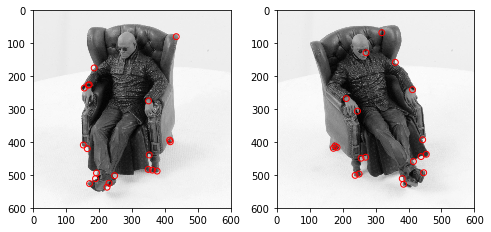

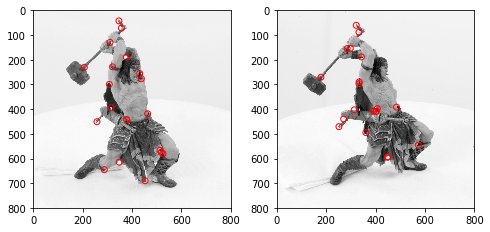

In [229]:

def show_corners_result(imgs, corners):
    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot(221)
    ax1.imshow(imgs[0], cmap='gray')
    ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=35, edgecolors='r', facecolors='none')

    ax2 = fig.add_subplot(222)
    ax2.imshow(imgs[1], cmap='gray')
    ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=35, edgecolors='r', facecolors='none')
    plt.show()

show_corners_result(imgs_mat, crns_mat)
show_corners_result(imgs_war, crns_war)

windowSize: 3
smoothSTD: 0.5


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


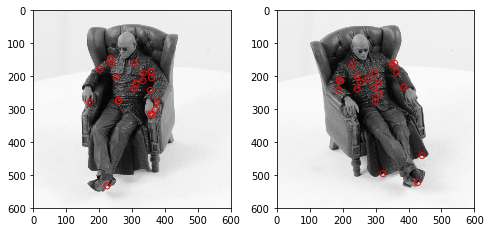

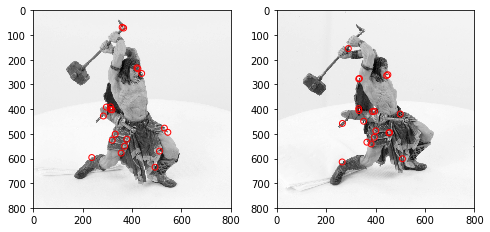

windowSize: 5
smoothSTD: 0.5


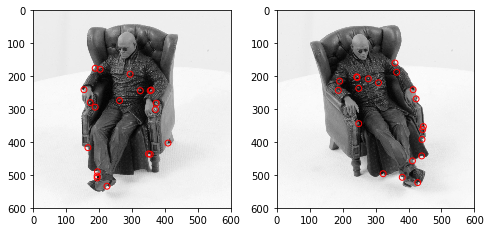

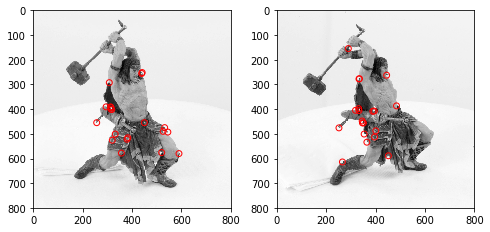

windowSize: 9
smoothSTD: 0.5


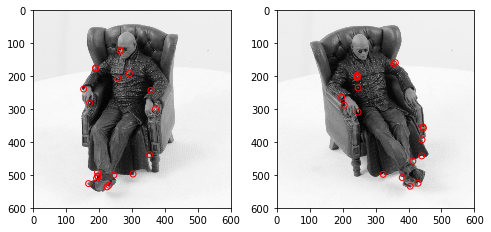

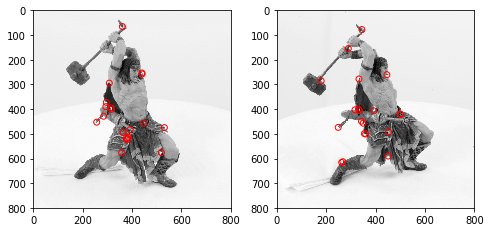

windowSize: 17
smoothSTD: 0.5


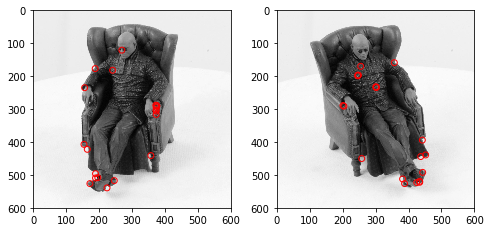

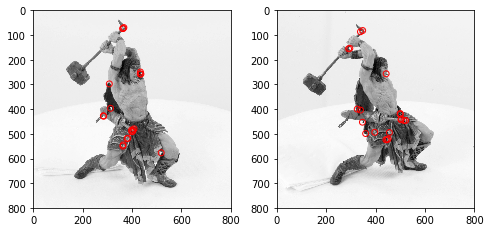

windowSize: 3
smoothSTD: 1


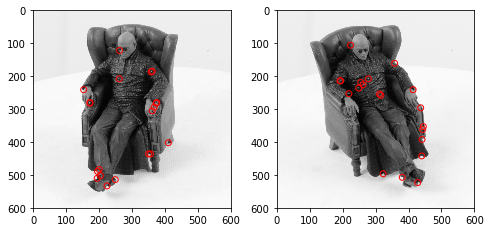

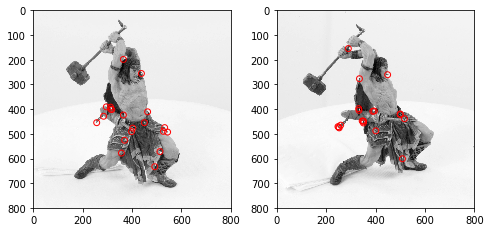

windowSize: 5
smoothSTD: 1


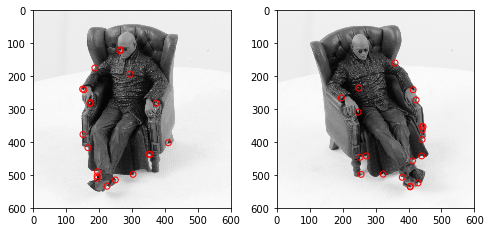

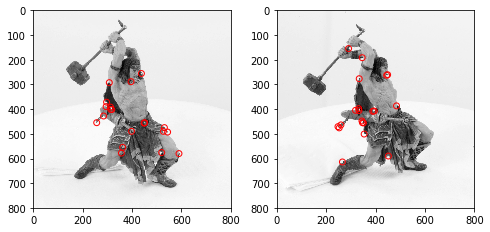

windowSize: 9
smoothSTD: 1


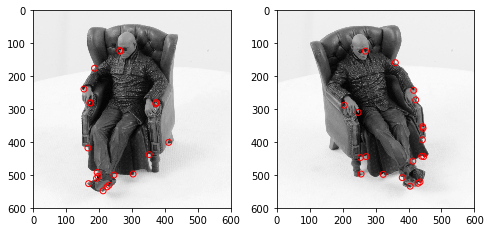

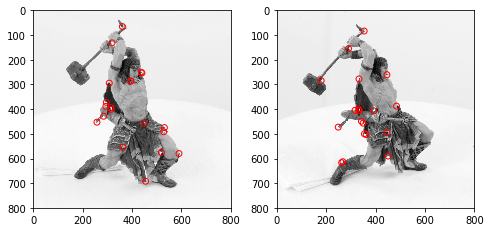

windowSize: 17
smoothSTD: 1


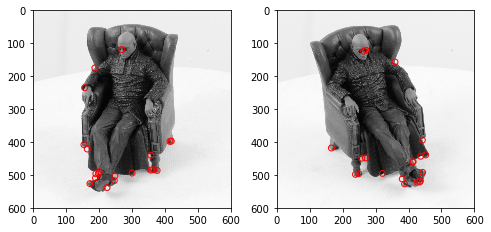

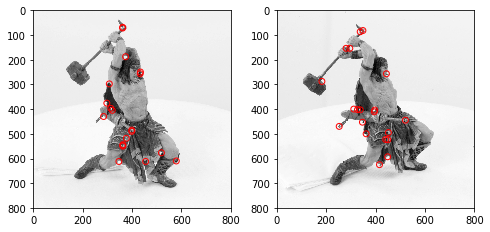

windowSize: 3
smoothSTD: 2


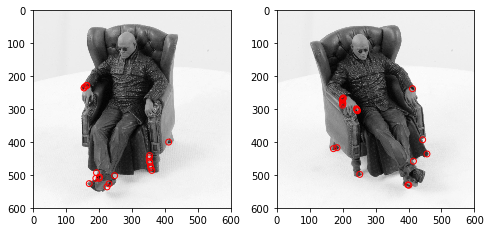

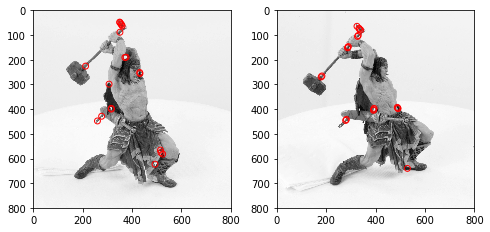

windowSize: 5
smoothSTD: 2


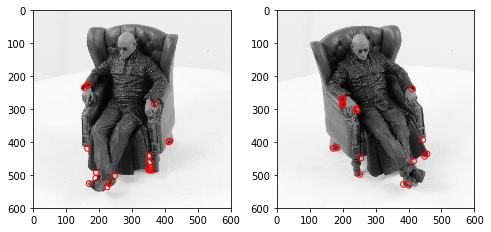

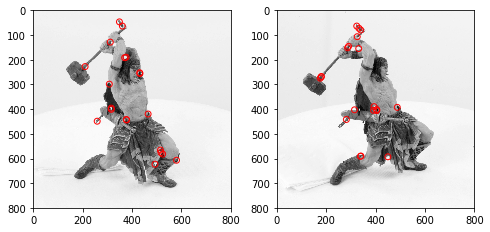

windowSize: 9
smoothSTD: 2


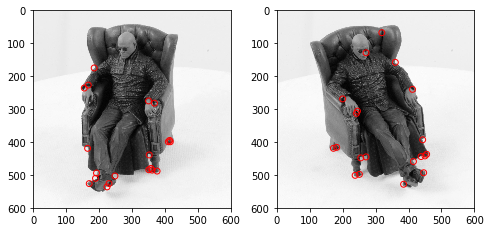

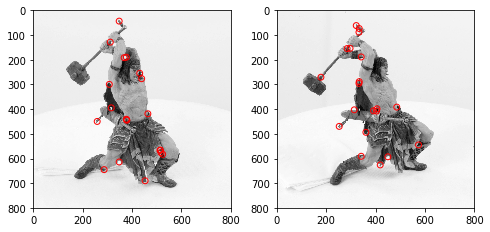

windowSize: 17
smoothSTD: 2


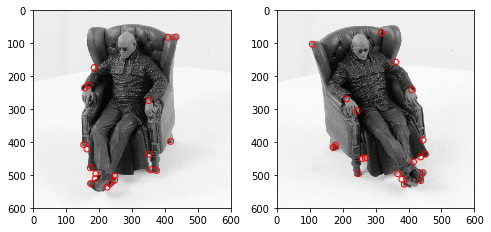

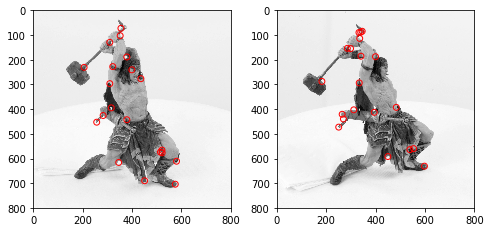

windowSize: 3
smoothSTD: 4


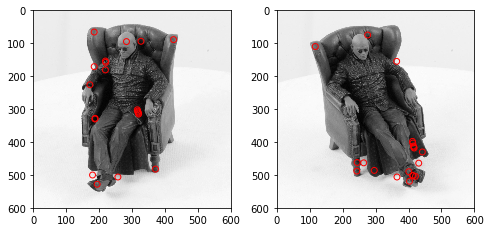

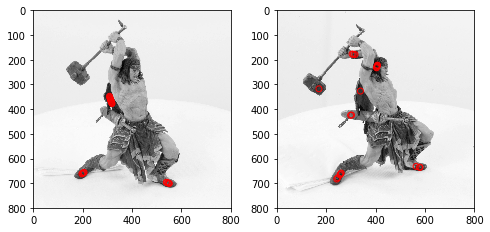

windowSize: 5
smoothSTD: 4


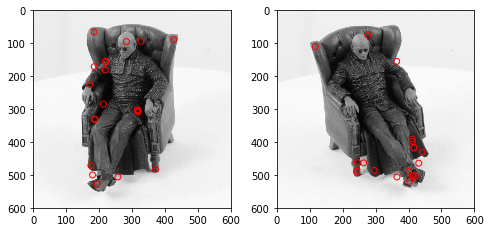

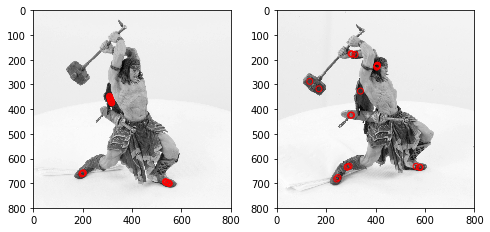

windowSize: 9
smoothSTD: 4


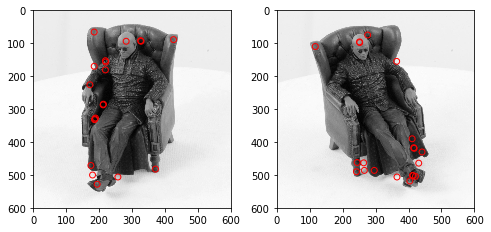

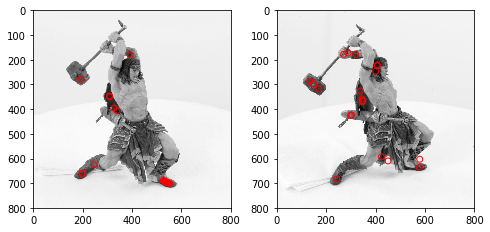

windowSize: 17
smoothSTD: 4


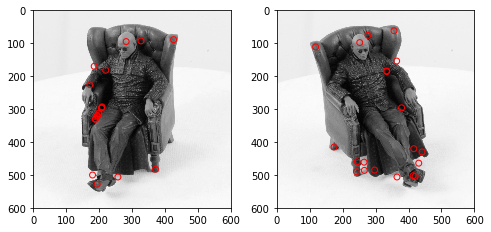

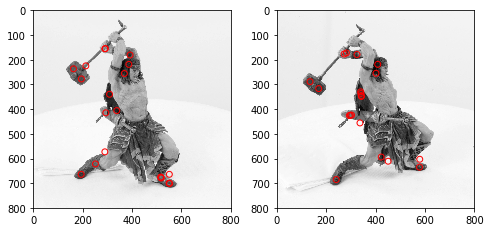

In [231]:

windowSizes = [3, 5, 9, 17]
smoothSTDs = [0.5, 1, 2, 4]

# read images and detect corners on images

for smoothSTD in smoothSTDs:
    for windowSize in windowSizes:
        print("windowSize:", windowSize)
        print("smoothSTD:", smoothSTD)
        imgs_mat = []
        crns_mat = []
        imgs_war = []
        crns_war = []
        for i in range(2):
            img_mat = imread('p4/matrix/matrix' + str(i) + '.png')
            #img_mat = imresize(img_mat, [size, size]) # for speed up
            #imgs_mat.append(rgb2gray(img_mat))
            # downsize your image in case corner_detect runs slow in test
            imgs_mat.append(rgb2gray(img_mat)[::2, ::2])
            crns_mat.append(corner_detect(imgs_mat[i], nCorners, smoothSTD, windowSize))
            
            img_war = imread('p4/warrior/warrior' + str(i) + '.png')
            #img_war = imresize(img_war, [size, size]) # for speed up
            #imgs_war.append(rgb2gray(img_war))
            # downsize your image in case corner_detect runs slow in test
            imgs_war.append(rgb2gray(img_war)[::2, ::2])
            crns_war.append(corner_detect(imgs_war[i], nCorners, smoothSTD, windowSize))
        show_corners_result(imgs_mat, crns_mat)
        show_corners_result(imgs_war, crns_war)


### NCC (Normalized Cross-Correlation) Matching

NCC = $\sum_{i,j}\tilde{W_1} (i,j)\cdot \tilde{W_2} (i,j)$ where $\tilde{W} = \frac{W - \overline{W}}{\sqrt{\sum_{k,l}(W(k,l) - \overline{W})^2}}$ is a mean-shifted and normalized version of the window and $\overline{W}$ is the mean pixel value in the window W.

In [17]:
def ncc_match(img1, img2, c1, c2, R):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        NCC matching score for two input windows.

    """
    
    
    x1 = c1[0]
    y1 = c1[1]
    x2 = c2[0]
    y2 = c2[1]
    
    img1_pad = np.zeros([img1.shape[0]+2*R+1, img1.shape[1]+2*R+1])
    img2_pad = np.zeros([img2.shape[0]+2*R+1, img2.shape[1]+2*R+1])
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            img1_pad[i+R, j+R] = img1[i][j]
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            img2_pad[i+R, j+R] = img2[i][j]
    patch1 = img1_pad[y1:y1+2*R+1, x1:x1+2*R+1]
    patch2 = img2_pad[y2:y2+2*R+1, x2:x2+2*R+1]
    
    mw1 = patch1.mean()
    mw2 = patch2.mean()
    W11 = 0
    W22 = 0
    W12 = 0
    #for i in range(Rx_low+Rx_high):
    #    for j in range(Ry_low+Ry_high):
    for i in range(2*R+1):
        for j in range(2*R+1):
            try:
                w1 = patch1[i,j]
                w2 = patch2[i,j]
            except:
                return 0
            W11 += (w1-mw1)*(w1-mw1)
            W12 += (w1-mw1)*(w2-mw2)
            W22 += (w2-mw2)*(w2-mw2)
    matching_score = W12/np.sqrt(W11*W22)
    
    return matching_score

In [18]:
# test NCC match
img1 = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 8, 9, 4]])
img2 = np.array([[1, 2, 1, 3], [6, 5, 4, 4], [9, 8, 7, 3]])
print(ncc_match(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 0.8546
print(ncc_match(img1, img2, np.array([2, 1]), np.array([2, 1]), 1))
# should print 0.8457
print(ncc_match(img1, img2, np.array([1, 1]), np.array([2, 1]), 1))
# should print 0.6258

0.8546547739343039
0.845761528217442
0.6258689611426175


### Naive Matching 


In [19]:
def naive_matching(img1, img2, corners1, corners2, R, SSDth):
    """Compute SSD given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Corners in image 1 (nx2)
        corners2: Corners in image 2 (nx2)
        R: SSD matching radius
        SSDth: SSD matching score threshold

    Returns:
        SSD matching result a list of tuple (c1, c2), 
        c1 is the 1x2 corner location in image 1, 
        c2 is the 1x2 corner location in image 2. 

    """
    
    
    threshold = SSDth  #SSDth
    matching = []
    for c1 in corners1:
        best_ncc = threshold
        best_c2 = []
        for c2 in corners2:
            if best_ncc <= ncc_match(img1, img2, c1, c2, R):
                best_ncc = ncc_match(img1, img2, c1, c2, R)
                best_c2 = c2
        if best_ncc > threshold:
            matching.append((c1, best_c2))
    return matching

Computing matrix0... 


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


Computing warrior0... 


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Computing matrix1... 
Computing warrior1... 
Done.


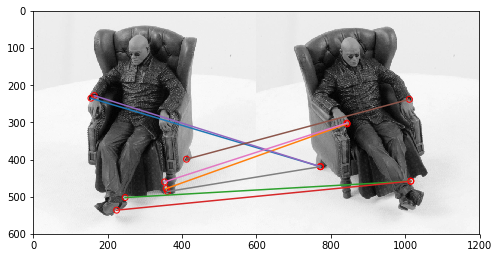

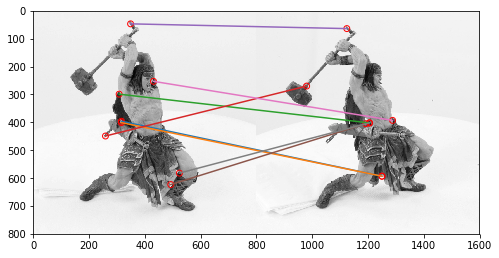

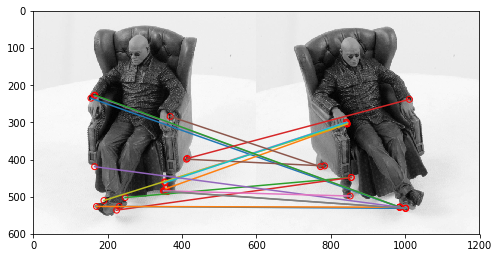

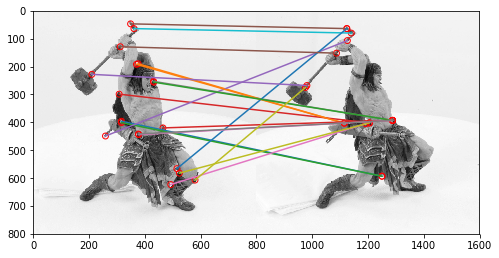

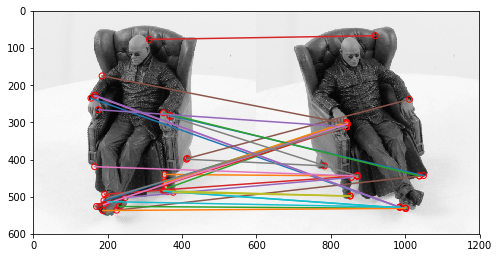

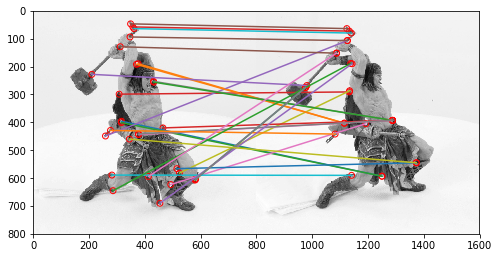

In [236]:
# detect corners on warrior and matrix sets
# adjust your corner detection parameters here
nCorners = 30
smoothSTD = 2
windowSize = 5

# read images and detect corners on images
imgs_mat = []
crns_mat = []
imgs_war = []
crns_war = []
for i in range(2):
    print('Computing matrix' + str(i) + '... ')
    img_mat = imread('p4/matrix/matrix' + str(i) + '.png')
    #img_mat = imresize(img_mat, [size, size])
    #imgs_mat.append(rgb2gray(img_mat))
    # downsize your image in case corner_detect runs slow in test
    imgs_mat.append(rgb2gray(img_mat)[::2, ::2])
    crns_mat.append(corner_detect(imgs_mat[i], nCorners, smoothSTD, windowSize))
    
    print('Computing warrior' + str(i) + '... ')
    img_war = imread('p4/warrior/warrior' + str(i) + '.png')
    #img_war = imresize(img_war, [size, size])
    #imgs_war.append(rgb2gray(img_war))
    imgs_war.append(rgb2gray(img_war)[::2, ::2])
    crns_war.append(corner_detect(imgs_war[i], nCorners, smoothSTD, windowSize))
print("Done.")
    
# match corners
R = 15
NCCth = 0.3

# plot matching result
def show_matching_result(img1, img2, matching):
    #img1 = img1[::2, ::2]
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(np.hstack((img1, img2)), cmap='gray') # two dino images are of different sizes, resize one before use
    for p1, p2 in matching:
        plt.scatter(p1[0], p1[1], s=35, edgecolors='r', facecolors='none')
        plt.scatter(p2[0] + img1.shape[1], p2[1], s=35, edgecolors='r', facecolors='none')
        plt.plot([p1[0], p2[0] + img1.shape[1]], [p1[1], p2[1]])
    plt.savefig('dino_matching.png')
    plt.show()

for nc in [10, 20, 30]:
    matching_mat = naive_matching(imgs_mat[0]/255, imgs_mat[1]/255, crns_mat[0][:nc], crns_mat[1][:nc], R, NCCth)
    matching_war = naive_matching(imgs_war[0]/255, imgs_war[1]/255, crns_war[0][:nc], crns_war[1][:nc], R, NCCth)
    show_matching_result(imgs_mat[0], imgs_mat[1], matching_mat)
    show_matching_result(imgs_war[0], imgs_war[1], matching_war)

#### The result of Naive Matching

The numbers of the correct matching pairs are these.

 - nCorners=10:   matrix:1  warrior:1 
 - nCorners=20:   matrix:2  warrior:6 
 - nCorners=30:   matrix:4  warrior:10



### Epipolar Geometry 


In [30]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
from scipy.io import loadmat

def compute_fundamental(x1,x2):
    """    Computes the fundamental matrix from corresponding points 
        (x1,x2 3*n arrays) using the 8 point algorithm.
        Each row in the A matrix below is constructed as
        [x'*x, x'*y, x', y'*x, y'*y, y', x, y, 1] 
    """
    
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")
    
    # build matrix for equations
    A = np.zeros((n,9))
    for i in range(n):
        A[i] = [x1[0,i]*x2[0,i], x1[0,i]*x2[1,i], x1[0,i]*x2[2,i],
                x1[1,i]*x2[0,i], x1[1,i]*x2[1,i], x1[1,i]*x2[2,i],
                x1[2,i]*x2[0,i], x1[2,i]*x2[1,i], x1[2,i]*x2[2,i] ]
            
    # compute linear least square solution
    U,S,V = np.linalg.svd(A)
    F = V[-1].reshape(3,3)
        
    # constrain F
    # make rank 2 by zeroing out last singular value
    U,S,V = np.linalg.svd(F)
    S[2] = 0
    F = np.dot(U,np.dot(np.diag(S),V))
    
    return F/F[2,2]


def fundamental_matrix(x1,x2):
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")

    # normalize image coordinates
    x1 = x1 / x1[2]
    mean_1 = np.mean(x1[:2],axis=1)
    S1 = np.sqrt(2) / np.std(x1[:2])
    T1 = np.array([[S1,0,-S1*mean_1[0]],[0,S1,-S1*mean_1[1]],[0,0,1]])
    x1 = np.dot(T1,x1)
    
    x2 = x2 / x2[2]
    mean_2 = np.mean(x2[:2],axis=1)
    S2 = np.sqrt(2) / np.std(x2[:2])
    T2 = np.array([[S2,0,-S2*mean_2[0]],[0,S2,-S2*mean_2[1]],[0,0,1]])
    x2 = np.dot(T2,x2)

    # compute F with the normalized coordinates
    F = compute_fundamental(x1,x2)

    # reverse normalization
    F = np.dot(T1.T,np.dot(F,T2))

    return F/F[2,2]

def compute_epipole(F):
    '''
    This function computes the epipoles for a given fundamental matrix and corner point correspondences
    input:
    F--> Fundamental matrix
    output:
    e1--> corresponding epipole in image 1
    e2--> epipole in image2
    '''
    #your code here
    
    eigenvalues, eigenvectors = np.linalg.eig(F)
    zero_index = np.argmin(abs(eigenvalues))
    e2 = eigenvectors[:,zero_index]
    e2 = e2/e2[2]
    #print(F*np.matrix(e2).T)
    
    eigenvalues, eigenvectors = np.linalg.eig(F.T)
    zero_index = np.argmin(abs(eigenvalues))
    e1 = eigenvectors[:,zero_index]
    e1 = e1/e1[2]
    #print(F.T*np.matrix(e1).T)
    
    return e1,e2

In [31]:
def plot_epipolar_lines(img1,img2, cor1, cor2):
    """Plot epipolar lines on image given image, corners

    Args:
        img1: Image 1.
        img2: Image 2.
        cor1: Corners in homogeneous image coordinate in image 1 (3xn)
        cor2: Corners in homogeneous image coordinate in image 2 (3xn)

    """
    
    F = fundamental_matrix(cor1, cor2)
    e1, e2 = compute_epipole(F)
    
    def plot_each_image(img, cor, e):
        n = cor.shape[1]
        fig = plt.figure(figsize=(8, 8))
        plt.imshow(img, cmap='gray') # two dino images are of different sizes, resize one before use
        for i in range(n):
            plt.scatter(cor[0,i], cor[1,i], s=35, edgecolors='r', facecolors='none')
            v0 = cor[0,i] - e[0]
            v1 = cor[1,i] - e[1]
            plt.plot([e[0]+10*v0, e[0]], [e[1]+10*v1, e[1]])
            plt.xlim((0,img.shape[1]))
            plt.ylim((img.shape[0],0))
        plt.show()
        
    plot_each_image(img1,cor1,e1)
    plot_each_image(img2,cor2,e2)
    
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


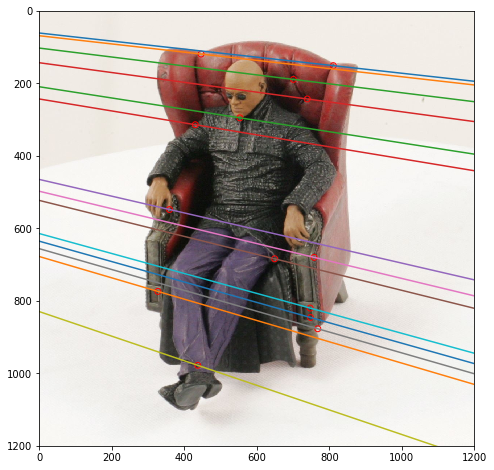

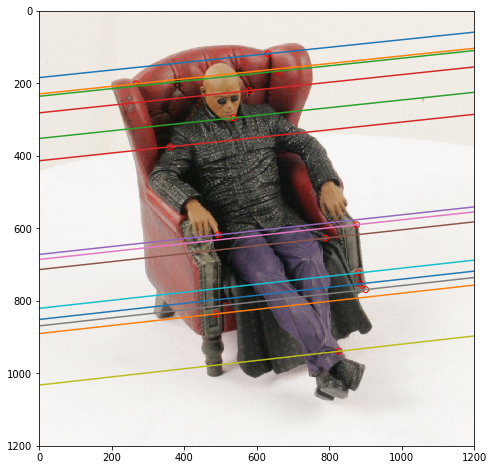

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


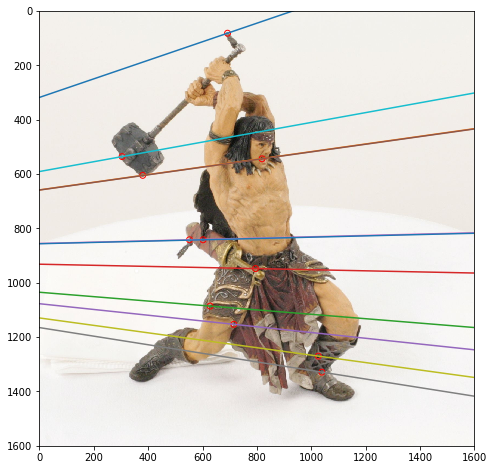

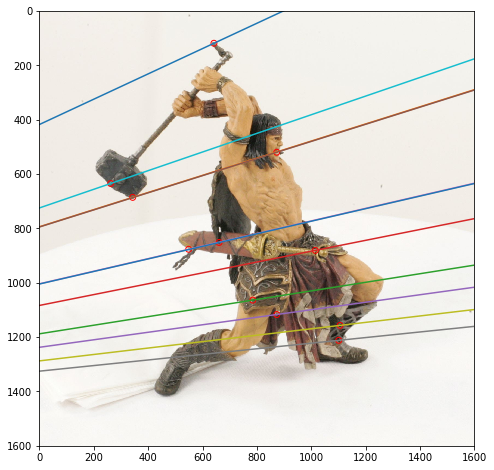

In [32]:
# replace images and corners with those of matrix and warrior

#I1 = imread("./p4/dino/dino0.png")
#I2 = imread("./p4/dino/dino1.png")
#cor1 = np.load("./p4/dino/cor1.npy")
#cor2 = np.load("./p4/dino/cor2.npy")
#plot_epipolar_lines(I1,I2,cor1,cor2)

I1 = imread("./p4/matrix/matrix0.png")
I2 = imread("./p4/matrix/matrix1.png")
cor1 = np.load("./p4/matrix/cor1.npy")
cor2 = np.load("./p4/matrix/cor2.npy")
plot_epipolar_lines(I1,I2,cor1,cor2)

I1 = imread("./p4/warrior/warrior0.png")
I2 = imread("./p4/warrior/warrior1.png")
cor1 = np.load("./p4/warrior/cor1.npy")
cor2 = np.load("./p4/warrior/cor2.npy")
plot_epipolar_lines(I1,I2,cor1,cor2)


### Image Rectification


In [198]:
def compute_matching_homographies(e2, F, im2, points1, points2):
    
    '''This function computes the homographies to get the rectified images
    input:
    e2--> epipole in image 2
    F--> the Fundamental matrix
    im2--> image2
    points1 --> corner points in image1
    points2--> corresponding corner points in image2
    output:
    H1--> Homography for image 1
    H2--> Homography for image 2
    '''
    # calculate H2
    width = im2.shape[1]
    height = im2.shape[0]

    T = np.identity(3)
    T[0][2] = -1.0 * width / 2
    T[1][2] = -1.0 * height / 2

    e = T.dot(e2)
    e1_prime = e[0]
    e2_prime = e[1]
    if e1_prime >= 0:
        alpha = 1.0
    else:
        alpha = -1.0

    R = np.identity(3)
    R[0][0] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[0][1] = alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][0] = - alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][1] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)

    f = R.dot(e)[0]
    G = np.identity(3)
    G[2][0] = - 1.0 / f

    H2 = np.linalg.inv(T).dot(G.dot(R.dot(T)))

    # calculate H1
    e_prime = np.zeros((3, 3))
    e_prime[0][1] = -e2[2]
    e_prime[0][2] = e2[1]
    e_prime[1][0] = e2[2]
    e_prime[1][2] = -e2[0]
    e_prime[2][0] = -e2[1]
    e_prime[2][1] = e2[0]

    v = np.array([1, 1, 1])
    M = e_prime.dot(F) + np.outer(e2, v)

    points1_hat = H2.dot(M.dot(points1.T)).T
    points2_hat = H2.dot(points2.T).T

    W = points1_hat / points1_hat[:, 2].reshape(-1, 1)
    b = (points2_hat / points2_hat[:, 2].reshape(-1, 1))[:, 0]

    # least square problem
    a1, a2, a3 = np.linalg.lstsq(W, b)[0]
    HA = np.identity(3)
    HA[0] = np.array([a1, a2, a3])

    H1 = HA.dot(H2).dot(M)
    return H1, H2

def image_rectification(im1,im2,points1,points2):
    '''this function provides the rectified images along with the new corner points as outputs for a given pair of 
    images with corner correspondences
    input:
    im1--> image1
    im2--> image2
    points1--> corner points in image1
    points2--> corner points in image2
    outpu:
    rectified_im1-->rectified image 1
    rectified_im2-->rectified image 2
    new_cor1--> new corners in the rectified image 1
    new_cor2--> new corners in the rectified image 2
    '''
    
    
    F = fundamental_matrix(points1, points2)
    e1, e2 = compute_epipole(F)
    H1, H2 = compute_matching_homographies(e2, F.T, im2, points1.T, points2.T)
    
    def make_rectified_im(im, H):
        
        H_inv = np.matrix(np.linalg.inv(H))
        
        im_4corners = np.matrix([[0,0,1], [0,im.shape[0],1], [im.shape[1],0, 1], [im.shape[1], im.shape[0], 1]]).T    
        im_4corners_new = np.array(np.matrix(H) * im_4corners)
        im_4corners_new = im_4corners_new / im_4corners_new[2,:]
        
        offset_row = int(min(im_4corners_new[1,:]))
        offset_col = int(min(im_4corners_new[0,:]))
        rec_im_nrow = int(max(im_4corners_new[1,:]) - min(im_4corners_new[1,:]))
        rec_im_ncol = int(max(im_4corners_new[0,:]) - min(im_4corners_new[0,:]))
        
        im_gray = rgb2gray(im)
        
        rectified_im = np.zeros([rec_im_nrow, rec_im_ncol])
        for i in range(rec_im_nrow):
            for j in range(rec_im_ncol):
                orig_coord = H_inv * np.matrix([j+offset_col,i+offset_row,1]).T
                u = int(orig_coord[1,0]/orig_coord[2,0])
                v = int(orig_coord[0,0]/orig_coord[2,0])
                if 0<u and u<im.shape[0] and 0<v and v<im.shape[1]:
                    rectified_im[i, j] = im_gray[u,v]
        return rectified_im, offset_row, offset_col
    
    rectified_im1, offset_row1, offset_col1 = make_rectified_im(im1, H1)
    rectified_im2, offset_row2, offset_col2 = make_rectified_im(im2, H2)
    
    def make_new_cor(H, points, offset_row, offset_col):
        new_cor = np.array(np.matrix(H) * np.matrix(points))
        new_cor = new_cor / new_cor[2,:]
        new_cor = new_cor - np.array([[offset_col], [offset_row], [0]])    
        return new_cor
    
    new_cor1 = make_new_cor(H1, points1, offset_row1, offset_col1)
    new_cor2 = make_new_cor(H2, points2, offset_row2, offset_col2)
    
    fig = plt.figure(figsize=(8, 8))
    for i in range(new_cor1.shape[1]):
        plt.scatter(new_cor1[0,i], new_cor1[1,i], s=35, edgecolors='r', facecolors='none')
        plt.plot([-99999, 99999], [new_cor1[1,i], new_cor1[1,i]])
    plt.imshow(rectified_im1, cmap="gray")
    plt.show()
    
    fig = plt.figure(figsize=(8, 8))
    for i in range(new_cor2.shape[1]):
        plt.scatter(new_cor2[0,i], new_cor2[1,i], s=35, edgecolors='r', facecolors='none')
        plt.plot([-99999, 99999], [new_cor2[1,i], new_cor2[1,i]])
    plt.imshow(rectified_im2, cmap="gray")
    plt.show()
    
    return rectified_im1,rectified_im2,new_cor1,new_cor2, offset_row1, offset_row2

### Matching Using epipolar geometry



In [212]:
def display_correspondence(img1, img2, corrs):
    """Plot matching result on image pair given images and correspondences

    Args:
        img1: Image 1.
        img2: Image 2.
        corrs: Corner correspondence

    """
    
    
    nrow1, ncol1 = img1.shape
    nrow2, ncol2 = img2.shape
    
    scale = 1000
    img1 = imresize(img1, [scale, scale])
    img2 = imresize(img2, [scale, scale])
    for i in range(len(corrs)):
        corrs[i] = ((corrs[i][0][0]*scale/ncol1, corrs[i][0][1]*scale/nrow1), (corrs[i][1][0]*scale/ncol2, corrs[i][1][1]*scale/nrow2))
    
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(np.hstack((img1, img2)), cmap='gray') # two dino images are of different sizes, resize one before use
    for p1, p2 in corrs:
        plt.scatter(p1[0], p1[1], s=35, edgecolors='r', facecolors='none')
        plt.scatter(p2[0] + img1.shape[1], p2[1], s=35, edgecolors='r', facecolors='none')
        plt.plot([p1[0], p2[0] + img1.shape[1]], [p1[1], p2[1]])
    plt.show()
    
    
def correspondence_matching_epipole(img1, img2, corners1, F, R, NCCth ,offset_row1, offset_row2):
    """Find corner correspondence along epipolar line.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Detected corners in image 1.
        F: Fundamental matrix calculated using given ground truth corner correspondences.
        R: NCC matching window radius.
        NCCth: NCC matching threshold.
    
    Returns:
        Matching result to be used in display_correspondence function

    """
    threshold = 0.3 #NCCth
    matching = []
    for c1 in corners1:
        
        b = F.T*np.matrix([c1[0], c1[1], 1]).T
        #b[0] ~= 0.
        y = -b[2]/b[1]
        y = int(y)
        
        
        best_ncc = threshold
        best_c2 = []
        for x in range(img2.shape[0]):
            c2 = (x,y)
            if best_ncc <= ncc_match(img1, img2, c1, c2, R):
                best_ncc = ncc_match(img1, img2, c1, c2, R)
                best_c2 = c2
        if best_ncc > threshold:
                matching.append((c1, best_c2))
    return matching
        

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is dep

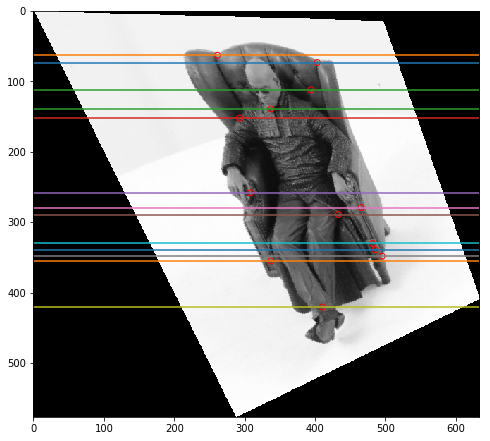

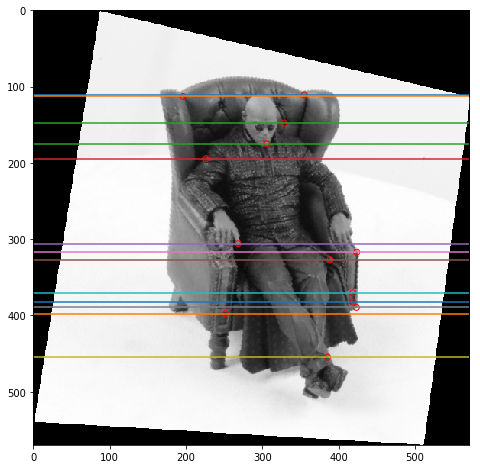

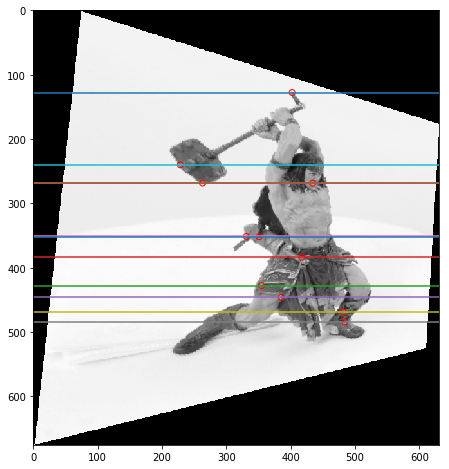

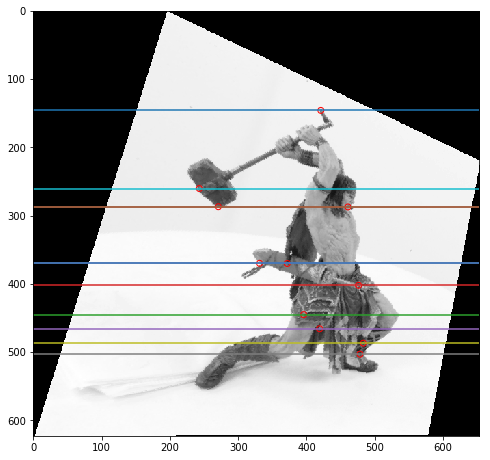

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice.
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


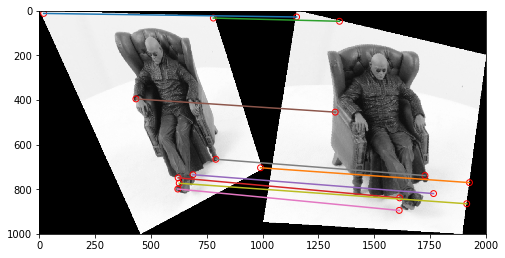

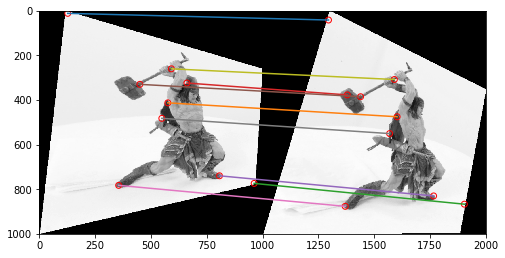

In [222]:
I1=imread("./p4/matrix/matrix0.png")
I2=imread("./p4/matrix/matrix1.png")
cor1 = np.load("./p4/matrix/cor1.npy")
cor2 = np.load("./p4/matrix/cor2.npy")
I3=imread("./p4/warrior/warrior0.png")
I4=imread("./p4/warrior/warrior1.png")
cor3 = np.load("./p4/warrior/cor1.npy")
cor4 = np.load("./p4/warrior/cor2.npy")

##debug: resize to speed up
##size = 300  Change the variable at the first part of this file.
def resize_all(I, cor):
    nrow, ncol = I.shape[:2]
    I = imresize(I, [size, size])
    cor = np.array(cor/np.matrix([ncol/size, nrow/size, 1]).T)
    #cor = np.array(cor/np.matrix([ncol/size, nrow/size, 1]).T) #sasaki
    return I, cor
I1, cor1 = resize_all(I1, cor1)
I2, cor2 = resize_all(I2, cor2)
I3, cor3 = resize_all(I3, cor3)
I4, cor4 = resize_all(I4, cor4)

idx = list(range(cor1.shape[1]))
idx.pop(12)
cor1 = cor1[:, idx]
cor2 = cor2[:, idx]

rectified_im1,rectified_im2,new_cor1,new_cor2 ,offset_row1, offset_row2= image_rectification(I1,I2,cor1,cor2)
rectified_im3,rectified_im4,new_cor3,new_cor4 ,offset_row3, offset_row4= image_rectification(I3,I4,cor3,cor4)

F_new = fundamental_matrix(new_cor1, new_cor2)

nCorners = 10
#decide the NCC matching window radius
R = 25 
# detect corners using corner detector here, store in corners1

corners1 = corner_detect(rectified_im1, nCorners, smoothSTD, windowSize)
corrs = correspondence_matching_epipole(rectified_im1, rectified_im2, corners1, F_new, R, NCCth ,offset_row1, offset_row2)
display_correspondence(rectified_im1, rectified_im2, corrs)

F_new2=fundamental_matrix(new_cor3, new_cor4)

corners2 = corner_detect(rectified_im3, nCorners, smoothSTD, windowSize)
corrs = correspondence_matching_epipole(rectified_im3, rectified_im4, corners2, F_new2, R, NCCth ,offset_row3, offset_row4)
display_correspondence(rectified_im3, rectified_im4, corrs)